In [0]:
import os 
import numpy as np 
from keras.utils.np_utils  import to_categorical
from sklearn.preprocessing import LabelEncoder
from keras.preprocessing import image
from sklearn.preprocessing import LabelBinarizer
from PIL import Image
from sklearn.svm import SVC

from sklearn.naive_bayes import GaussianNB
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from keras.optimizers import Adam
from keras.layers import Dense, Conv2D, MaxPooling2D , Flatten,Dense,Softmax,Activation, Dropout,BatchNormalization
from keras.models import Sequential
from keras.applications.vgg16 import VGG16
import seaborn as sns
import random
import h5py
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from skimage.color import rgb2grey
from skimage.feature import hog
from keras.callbacks import ModelCheckpoint

Using TensorFlow backend.


In [0]:
image_path=r'D:\plantdisease\PlantVillage\PlantVillage'
images=[]
i=0
for F in os.walk(image_path):
    if(i!=0):
        for f in F[2]:
            images.append(os.path.join(F[0],f))
    i+=1
    
    

In [0]:
print(len(images))

20639


In [0]:
labels=[]
disease_type=[]
for im in images:
    labels.append(im.split('\\')[4])
    disease_type.append(im.split('\\')[4])
labels=LabelEncoder().fit_transform(labels)
print(labels)

[ 0  0  0 ... 12 12 12]


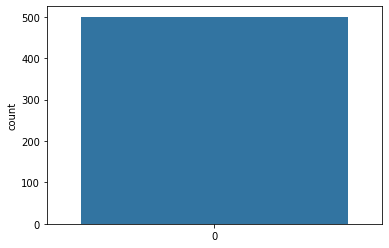

In [0]:
sns.countplot(labels[:500])

In [0]:
classes=np.unique(labels)
disease=np.unique(disease_type)
n_classes=classes.shape[0]
Y=to_categorical(np.array(labels),n_classes)
print(Y.shape)
n_classes
print(disease)

(20639, 15)
['Pepper__bell___Bacterial_spot' 'Pepper__bell___healthy'
 'Potato___Early_blight' 'Potato___Late_blight' 'Potato___healthy'
 'Tomato_Bacterial_spot' 'Tomato_Early_blight' 'Tomato_Late_blight'
 'Tomato_Leaf_Mold' 'Tomato_Septoria_leaf_spot'
 'Tomato_Spider_mites_Two_spotted_spider_mite' 'Tomato__Target_Spot'
 'Tomato__Tomato_YellowLeaf__Curl_Virus' 'Tomato__Tomato_mosaic_virus'
 'Tomato_healthy']


In [0]:
def random_sample(X,no_of_samples):
    image_sample=[]
    new_labels=[]
    smple=int(np.ceil(no_of_samples/classes.s hape[0]))
    #smple=5
    print(smple)
    smple_cnt=0
    for d in disease:
         #print(d)
         c=0
         for x in X:
               
                if(x.split('\\')[4]==d and c<smple and smple_cnt<1000 ):
                    #print(x)
                    image_sample.append(x)
                    new_labels.append(d)
                    c+=1
                    smple_cnt+=1
         #print('----------------------')
    print(len(image_sample))
    return image_sample,new_labels
            
        
Image_sample,Labels=(random_sample(np.array(images),5000))
data=list(zip(Image_sample,Labels))
random.shuffle(data)
X,Y=zip(*data)
print(len(Labels))

334
1000
1000


In [0]:
len(Image_sample)

1000

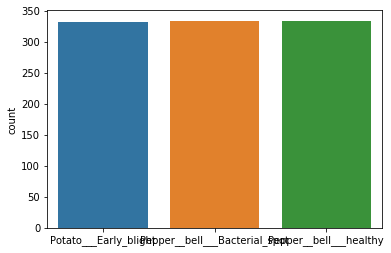

In [0]:
sns.countplot(Y)

In [0]:
aug=ImageDataGenerator(rotation_range=25, width_shift_range=0.1,
    height_shift_range=0.1, shear_range=0.2, 
    zoom_range=0.2,horizontal_flip=True, 
    fill_mode="nearest")

In [0]:
input_image=[]
for imgs in X:
    #print(imgs)
    img=image.load_img(imgs,target_size=(224,224))
    img=image.img_to_array(img)
    #img_grey=rgb2grey(img)
    #img_grey=img_grey.reshape(img_grey.shape[0],img_grey.shape[1],1)
    img=img.astype('float32')
    img_grey=img/255
    input_image.append(img)
#Input_image=np.array(input_image)

In [0]:
Input_image=np.array(input_image)

In [0]:
Input_image.shape

(1000, 224, 224, 3)

In [0]:
Y=LabelEncoder().fit_transform(Y)

In [0]:
Y[:100]

array([2, 2, 0, 2, 2, 0, 1, 2, 0, 1, 2, 2, 2, 0, 0, 0, 1, 2, 2, 0, 2, 1,
       1, 1, 2, 1, 2, 0, 0, 1, 2, 0, 2, 1, 0, 0, 2, 0, 2, 1, 2, 2, 1, 2,
       1, 0, 0, 1, 0, 2, 2, 2, 0, 2, 1, 1, 1, 0, 1, 0, 1, 0, 0, 2, 1, 0,
       0, 1, 1, 1, 1, 2, 1, 2, 1, 0, 1, 0, 2, 0, 2, 1, 0, 0, 2, 1, 2, 1,
       2, 1, 0, 1, 0, 2, 0, 1, 2, 1, 1, 2], dtype=int64)

In [0]:
binarizer=LabelBinarizer()
#Y_final=LabelEncoder().fit_transform(Y)
Y_final=binarizer.fit_transform(Y)
print(Y_final)
#Y_cat=Y=to_categorical(Y_final,n_classes)

[[0 0 1]
 [0 0 1]
 [1 0 0]
 ...
 [0 0 1]
 [1 0 0]
 [0 1 0]]


In [0]:
x_train,x_test,y_train,y_test=train_test_split(Input_image,Y_final,stratify=Y_final,test_size=0.3,random_state=42)

In [0]:
print(x_train.shape,y_train.shape)
print(x_test.shape)

(700, 224, 224, 3) (700, 3)
(300, 224, 224, 3)


In [0]:
model = Sequential()
model.add(Conv2D(32, kernel_size = (3, 3),activation='relu', input_shape=(224,224,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
#model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
#model.add(Dropout(0.3))
model.add(Dense(3, activation = 'softmax'))

In [0]:
INIT_LR=0.001
EPOCHS=25
BS=32
opt = Adam(lr=INIT_LR)
model.compile(optimizer=opt,loss='categorical_crossentropy',metrics=['accuracy'])

In [0]:
filepath="E:\\weights-improvementplantdisease-{epoch:02d}-{val_accuracy:.2f}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

In [0]:
history=model.fit_generator(aug.flow(x_train, y_train, batch_size=BS),epochs=EPOCHS,callbacks=callbacks_list,validation_data=(x_test,y_test),verbose=1)

Epoch 1/25
22/22 [==============================] - 66s 3s/step - loss: 0.3633 - accuracy: 0.8686 - val_loss: 8.6568 - val_accuracy: 0.5800

Epoch 00001: val_accuracy improved from 0.48667 to 0.58000, saving model to E:\weights-improvementplantdisease-01-0.58.hdf5
Epoch 2/25
22/22 [==============================] - 70s 3s/step - loss: 0.3613 - accuracy: 0.8643 - val_loss: 4.4872 - val_accuracy: 0.6967

Epoch 00002: val_accuracy improved from 0.58000 to 0.69667, saving model to E:\weights-improvementplantdisease-02-0.70.hdf5
Epoch 3/25
22/22 [==============================] - 66s 3s/step - loss: 0.2890 - accuracy: 0.8729 - val_loss: 4.7692 - val_accuracy: 0.7433

Epoch 00003: val_accuracy improved from 0.69667 to 0.74333, saving model to E:\weights-improvementplantdisease-03-0.74.hdf5
Epoch 4/25
22/22 [==============================] - 67s 3s/step - loss: 0.3539 - accuracy: 0.8829 - val_loss: 19.0149 - val_accuracy: 0.6000

Epoch 00004: val_accuracy did not improve from 0.74333
Epoch 5/

In [0]:
model.save('D:\PYTHON\MACHINE LEARNING USING PYTHON\OWN CONCEPT\VIT\M-TECH\PLANT_DISEASE_DETECTION_ARCHANA\SR\plant_disease.h5')
y_pred=model.predict(x_test)

In [0]:
vgg=VGG16(weights='imagenet',include_top=False,input_shape=(224,224,3))

In [0]:
vgg.trainable=False

In [0]:
model=Sequential()
model.add(vgg)
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(3, activation = 'softmax'))

In [0]:
INIT_LR=0.001
EPOCHS=25
BS=32
opt = Adam(lr=INIT_LR)
model.compile(optimizer=opt,loss='categorical_crossentropy',metrics=['accuracy'])

In [0]:
filepath="E:\\weights-improvementplantdiseasevgg16-{epoch:02d}-{val_accuracy:.2f}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

In [0]:
history=model.fit_generator(aug.flow(x_train, y_train, batch_size=BS),epochs=10,callbacks=callbacks_list,validation_data=(x_test,y_test),verbose=1)

Epoch 1/10
22/22 [==============================] - 336s 15s/step - loss: 16.6658 - accuracy: 0.5257 - val_loss: 0.8788 - val_accuracy: 0.7500

Epoch 00001: val_accuracy improved from -inf to 0.75000, saving model to E:\weights-improvementplantdiseasevgg16-01-0.75.hdf5
Epoch 2/10
22/22 [==============================] - 325s 15s/step - loss: 0.6114 - accuracy: 0.6514 - val_loss: 0.3653 - val_accuracy: 0.8933

Epoch 00002: val_accuracy improved from 0.75000 to 0.89333, saving model to E:\weights-improvementplantdiseasevgg16-02-0.89.hdf5
Epoch 3/10
22/22 [==============================] - 325s 15s/step - loss: 0.5502 - accuracy: 0.7786 - val_loss: 0.2911 - val_accuracy: 0.9067

Epoch 00003: val_accuracy improved from 0.89333 to 0.90667, saving model to E:\weights-improvementplantdiseasevgg16-03-0.91.hdf5
Epoch 4/10
22/22 [==============================] - 323s 15s/step - loss: 0.5533 - accuracy: 0.7800 - val_loss: 0.2762 - val_accuracy: 0.9267

Epoch 00004: val_accuracy improved from 0.9

In [0]:
model.save('E:\\plant_disease_vgg16.h5')